In [17]:
import numpy as np

samples = ["The cat sat on the mat.", "The dog ate my homework."]

token_index = {}
for sample in samples:
    for word in sample.split():
        if word not in token_index:
            token_index[word] = len(token_index) + 1
            
max_length = 10

results = np.zeros(shape=(len(samples),
                              max_length,
                              max(token_index.values()) + 1))

for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i, j, index] = 1
        
print (results)
        

[[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]]


In [22]:
import string

samples = ["The cat sat on the mat.", "The dog ate my homework."]
characters = string.printable
token_index = dict(zip(characters, range(1, len(characters) + 1)))

max_length = 50
results = np.zeros((len(samples), max_length, max(token_index.values())+1))
for i, sample in enumerate(samples):
    for j, character in enumerate(sample):
        index = token_index.get(str(character))
        results[i, j, index] = 1
        

In [25]:
from keras.preprocessing.text import Tokenizer

samples = ["The cat sat on the mat.", "The dog ate my homework."]

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(samples)

sequences = tokenizer.texts_to_sequences(samples)

one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

word_index =tokenizer.word_index

{'the': 1, 'cat': 2, 'sat': 3, 'on': 4, 'mat': 5, 'dog': 6, 'ate': 7, 'my': 8, 'homework': 9}


In [27]:
from keras.datasets import imdb
from keras import preprocessing

max_features = 10000
maxlen = 20

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test  = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)



In [29]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
print (history)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_2 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


Train on 20000 samples, validate on 5000 samples
Epoch 1/10


   32/20000 [..............................] - ETA: 3:45 - loss: 0.6882 - acc: 0.6562

  384/20000 [..............................] - ETA: 21s - loss: 0.6925 - acc: 0.5547 

  736/20000 [>.............................] - ETA: 12s - loss: 0.6918 - acc: 0.5462

  992/20000 [>.............................] - ETA: 9s - loss: 0.6926 - acc: 0.5383 

 1376/20000 [=>............................] - ETA: 7s - loss: 0.6928 - acc: 0.5254

 1632/20000 [=>............................] - ETA: 7s - loss: 0.6924 - acc: 0.5325

 2016/20000 [==>...........................] - ETA: 6s - loss: 0.6921 - acc: 0.5372

 2304/20000 [==>...........................] - ETA: 5s - loss: 0.6923 - acc: 0.5312

 2656/20000 [==>...........................] - ETA: 5s - loss: 0.6922 - acc: 0.5324

 2976/20000 [===>..........................] - ETA: 4s - loss: 0.6920 - acc: 0.5336

 3264/20000 [===>..........................] - ETA: 4s - loss: 0.6920 - acc: 0.5312

 3520/20000 [====>.........................] - ETA: 4s - loss: 0.6918 - acc: 0.5344

 3968/20000 [====>.........................] - ETA: 3s - loss: 0.6915 - acc: 0.5360

 4352/20000 [=====>........................] - ETA: 3s - loss: 0.6915 - acc: 0.5342

 4832/20000 [======>.......................] - ETA: 3s - loss: 0.6913 - acc: 0.5350

 5280/20000 [======>.......................] - ETA: 3s - loss: 0.6911 - acc: 0.5386

 5792/20000 [=======>......................] - ETA: 2s - loss: 0.6909 - acc: 0.5399

 6272/20000 [========>.....................] - ETA: 2s - loss: 0.6905 - acc: 0.5446

 6720/20000 [=========>....................] - ETA: 2s - loss: 0.6900 - acc: 0.5481

 7104/20000 [=========>....................] - ETA: 2s - loss: 0.6898 - acc: 0.5491

 7584/20000 [==========>...................] - ETA: 2s - loss: 0.6893 - acc: 0.5535

 7936/20000 [==========>...................] - ETA: 2s - loss: 0.6891 - acc: 0.5558

 8352/20000 [===========>..................] - ETA: 2s - loss: 0.6885 - acc: 0.5596

 8768/20000 [============>.................] - ETA: 1s - loss: 0.6882 - acc: 0.5611

 9216/20000 [============>.................] - ETA: 1s - loss: 0.6875 - acc: 0.5668

 9600/20000 [=============>................] - ETA: 1s - loss: 0.6871 - acc: 0.5689

10080/20000 [==============>...............] - ETA: 1s - loss: 0.6864 - acc: 0.5733

10560/20000 [==============>...............] - ETA: 1s - loss: 0.6858 - acc: 0.5770

11040/20000 [===============>..............] - ETA: 1s - loss: 0.6850 - acc: 0.5807

11488/20000 [================>.............] - ETA: 1s - loss: 0.6842 - acc: 0.5849

12064/20000 [=================>............] - ETA: 1s - loss: 0.6833 - acc: 0.5884

12512/20000 [=================>............] - ETA: 1s - loss: 0.6825 - acc: 0.5907

12960/20000 [==================>...........] - ETA: 1s - loss: 0.6819 - acc: 0.5929

13376/20000 [===================>..........] - ETA: 1s - loss: 0.6812 - acc: 0.5950

13824/20000 [===================>..........] - ETA: 0s - loss: 0.6803 - acc: 0.5979

14240/20000 [====================>.........] - ETA: 0s - loss: 0.6794 - acc: 0.6004

14688/20000 [=====================>........] - ETA: 0s - loss: 0.6783 - acc: 0.6038

15040/20000 [=====================>........] - ETA: 0s - loss: 0.6775 - acc: 0.6059

15552/20000 [======================>.......] - ETA: 0s - loss: 0.6763 - acc: 0.6085

16000/20000 [=======================>......] - ETA: 0s - loss: 0.6752 - acc: 0.6111

16480/20000 [=======================>......] - ETA: 0s - loss: 0.6739 - acc: 0.6147

16896/20000 [========================>.....] - ETA: 0s - loss: 0.6727 - acc: 0.6175

17376/20000 [=========================>....] - ETA: 0s - loss: 0.6715 - acc: 0.6198

17824/20000 [=========================>....] - ETA: 0s - loss: 0.6701 - acc: 0.6225

18304/20000 [==========================>...] - ETA: 0s - loss: 0.6686 - acc: 0.6251

18688/20000 [===========================>..] - ETA: 0s - loss: 0.6675 - acc: 0.6273

19168/20000 [===========================>..] - ETA: 0s - loss: 0.6660 - acc: 0.6298

19552/20000 [============================>.] - ETA: 0s - loss: 0.6651 - acc: 0.6306

20000/20000 [==============================] - 3s 150us/step - loss: 0.6638 - acc: 0.6327 - val_loss: 0.6062 - val_acc: 0.7050


Epoch 2/10
   32/20000 [..............................] - ETA: 9s - loss: 0.5660 - acc: 0.8125

  480/20000 [..............................] - ETA: 2s - loss: 0.5883 - acc: 0.7375

  864/20000 [>.............................] - ETA: 2s - loss: 0.5873 - acc: 0.7419

 1312/20000 [>.............................] - ETA: 2s - loss: 0.5844 - acc: 0.7500

 1696/20000 [=>............................] - ETA: 2s - loss: 0.5847 - acc: 0.7500

 2144/20000 [==>...........................] - ETA: 2s - loss: 0.5830 - acc: 0.7449

 2624/20000 [==>...........................] - ETA: 2s - loss: 0.5827 - acc: 0.7393

 3168/20000 [===>..........................] - ETA: 1s - loss: 0.5807 - acc: 0.7390

 3648/20000 [====>.........................] - ETA: 1s - loss: 0.5772 - acc: 0.7442

 4032/20000 [=====>........................] - ETA: 1s - loss: 0.5776 - acc: 0.7408

 4480/20000 [=====>........................] - ETA: 1s - loss: 0.5760 - acc: 0.7413

 4928/20000 [======>.......................] - ETA: 1s - loss: 0.5750 - acc: 0.7407

 5376/20000 [=======>......................] - ETA: 1s - loss: 0.5739 - acc: 0.7405

 5824/20000 [=======>......................] - ETA: 1s - loss: 0.5730 - acc: 0.7400

 6272/20000 [========>.....................] - ETA: 1s - loss: 0.5721 - acc: 0.7390

 6752/20000 [=========>....................] - ETA: 1s - loss: 0.5703 - acc: 0.7398

 7232/20000 [=========>....................] - ETA: 1s - loss: 0.5679 - acc: 0.7416

 7776/20000 [==========>...................] - ETA: 1s - loss: 0.5669 - acc: 0.7406

 8256/20000 [===========>..................] - ETA: 1s - loss: 0.5652 - acc: 0.7416

 8704/20000 [============>.................] - ETA: 1s - loss: 0.5649 - acc: 0.7409

 9152/20000 [============>.................] - ETA: 1s - loss: 0.5630 - acc: 0.7426

 9600/20000 [=============>................] - ETA: 1s - loss: 0.5621 - acc: 0.7425

10016/20000 [==============>...............] - ETA: 1s - loss: 0.5609 - acc: 0.7440

10432/20000 [==============>...............] - ETA: 1s - loss: 0.5606 - acc: 0.7440

10848/20000 [===============>..............] - ETA: 1s - loss: 0.5586 - acc: 0.7445

11232/20000 [===============>..............] - ETA: 1s - loss: 0.5583 - acc: 0.7443

11648/20000 [================>.............] - ETA: 0s - loss: 0.5578 - acc: 0.7440

12096/20000 [=================>............] - ETA: 0s - loss: 0.5566 - acc: 0.7452

12576/20000 [=================>............] - ETA: 0s - loss: 0.5547 - acc: 0.7451

13024/20000 [==================>...........] - ETA: 0s - loss: 0.5528 - acc: 0.7460

13504/20000 [===================>..........] - ETA: 0s - loss: 0.5513 - acc: 0.7466

13952/20000 [===================>..........] - ETA: 0s - loss: 0.5500 - acc: 0.7471

14368/20000 [====================>.........] - ETA: 0s - loss: 0.5487 - acc: 0.7472

14784/20000 [=====================>........] - ETA: 0s - loss: 0.5471 - acc: 0.7479

15232/20000 [=====================>........] - ETA: 0s - loss: 0.5461 - acc: 0.7487

15712/20000 [======================>.......] - ETA: 0s - loss: 0.5445 - acc: 0.7489

16256/20000 [=======================>......] - ETA: 0s - loss: 0.5436 - acc: 0.7489

16736/20000 [========================>.....] - ETA: 0s - loss: 0.5422 - acc: 0.7498

17184/20000 [========================>.....] - ETA: 0s - loss: 0.5416 - acc: 0.7495

17632/20000 [=========================>....] - ETA: 0s - loss: 0.5402 - acc: 0.7502

18048/20000 [==========================>...] - ETA: 0s - loss: 0.5383 - acc: 0.7511

18528/20000 [==========================>...] - ETA: 0s - loss: 0.5370 - acc: 0.7518

18944/20000 [===========================>..] - ETA: 0s - loss: 0.5360 - acc: 0.7520

19360/20000 [============================>.] - ETA: 0s - loss: 0.5353 - acc: 0.7518

19744/20000 [============================>.] - ETA: 0s - loss: 0.5345 - acc: 0.7522

20000/20000 [==============================] - 2s 122us/step - loss: 0.5332 - acc: 0.7534 - val_loss: 0.5204 - val_acc: 0.7326


Epoch 3/10
   32/20000 [..............................] - ETA: 3s - loss: 0.4743 - acc: 0.9062

  448/20000 [..............................] - ETA: 2s - loss: 0.4771 - acc: 0.7969

  896/20000 [>.............................] - ETA: 2s - loss: 0.4658 - acc: 0.8114

 1312/20000 [>.............................] - ETA: 2s - loss: 0.4677 - acc: 0.8026

 1696/20000 [=>............................] - ETA: 2s - loss: 0.4690 - acc: 0.7954

 2144/20000 [==>...........................] - ETA: 2s - loss: 0.4661 - acc: 0.7915

 2592/20000 [==>...........................] - ETA: 2s - loss: 0.4680 - acc: 0.7894

 3072/20000 [===>..........................] - ETA: 2s - loss: 0.4735 - acc: 0.7832

 3584/20000 [====>.........................] - ETA: 1s - loss: 0.4728 - acc: 0.7821

 4064/20000 [=====>........................] - ETA: 1s - loss: 0.4731 - acc: 0.7798

 4512/20000 [=====>........................] - ETA: 1s - loss: 0.4708 - acc: 0.7828

 4928/20000 [======>.......................] - ETA: 1s - loss: 0.4726 - acc: 0.7794

 5280/20000 [======>.......................] - ETA: 1s - loss: 0.4747 - acc: 0.7782

 5728/20000 [=======>......................] - ETA: 1s - loss: 0.4739 - acc: 0.7792

 6176/20000 [========>.....................] - ETA: 1s - loss: 0.4731 - acc: 0.7803

 6656/20000 [========>.....................] - ETA: 1s - loss: 0.4726 - acc: 0.7808

 7072/20000 [=========>....................] - ETA: 1s - loss: 0.4702 - acc: 0.7829

 7520/20000 [==========>...................] - ETA: 1s - loss: 0.4704 - acc: 0.7827

 8000/20000 [===========>..................] - ETA: 1s - loss: 0.4707 - acc: 0.7827

 8448/20000 [===========>..................] - ETA: 1s - loss: 0.4684 - acc: 0.7848

 8896/20000 [============>.................] - ETA: 1s - loss: 0.4667 - acc: 0.7857

 9280/20000 [============>.................] - ETA: 1s - loss: 0.4661 - acc: 0.7859

 9728/20000 [=============>................] - ETA: 1s - loss: 0.4668 - acc: 0.7844

10208/20000 [==============>...............] - ETA: 1s - loss: 0.4657 - acc: 0.7846

10656/20000 [==============>...............] - ETA: 1s - loss: 0.4654 - acc: 0.7842

11104/20000 [===============>..............] - ETA: 1s - loss: 0.4645 - acc: 0.7855

11552/20000 [================>.............] - ETA: 0s - loss: 0.4641 - acc: 0.7865

12000/20000 [=================>............] - ETA: 0s - loss: 0.4635 - acc: 0.7867

12544/20000 [=================>............] - ETA: 0s - loss: 0.4625 - acc: 0.7875

13024/20000 [==================>...........] - ETA: 0s - loss: 0.4619 - acc: 0.7871

13440/20000 [===================>..........] - ETA: 0s - loss: 0.4603 - acc: 0.7884

13888/20000 [===================>..........] - ETA: 0s - loss: 0.4597 - acc: 0.7884

14336/20000 [====================>.........] - ETA: 0s - loss: 0.4606 - acc: 0.7874

14720/20000 [=====================>........] - ETA: 0s - loss: 0.4612 - acc: 0.7865

15168/20000 [=====================>........] - ETA: 0s - loss: 0.4597 - acc: 0.7869

15616/20000 [======================>.......] - ETA: 0s - loss: 0.4596 - acc: 0.7875

16096/20000 [=======================>......] - ETA: 0s - loss: 0.4591 - acc: 0.7882

16608/20000 [=======================>......] - ETA: 0s - loss: 0.4594 - acc: 0.7882

17152/20000 [========================>.....] - ETA: 0s - loss: 0.4587 - acc: 0.7888

17632/20000 [=========================>....] - ETA: 0s - loss: 0.4584 - acc: 0.7892

18016/20000 [==========================>...] - ETA: 0s - loss: 0.4585 - acc: 0.7890

18304/20000 [==========================>...] - ETA: 0s - loss: 0.4582 - acc: 0.7887

18816/20000 [===========================>..] - ETA: 0s - loss: 0.4585 - acc: 0.7882

19264/20000 [===========================>..] - ETA: 0s - loss: 0.4580 - acc: 0.7881

19712/20000 [============================>.] - ETA: 0s - loss: 0.4593 - acc: 0.7868

20000/20000 [==============================] - 2s 123us/step - loss: 0.4588 - acc: 0.7869 - val_loss: 0.4982 - val_acc: 0.7484


Epoch 4/10
   32/20000 [..............................] - ETA: 5s - loss: 0.3550 - acc: 0.8438

  512/20000 [..............................] - ETA: 2s - loss: 0.4500 - acc: 0.7969

  992/20000 [>.............................] - ETA: 2s - loss: 0.4359 - acc: 0.7964

 1472/20000 [=>............................] - ETA: 2s - loss: 0.4239 - acc: 0.8071

 1920/20000 [=>............................] - ETA: 2s - loss: 0.4181 - acc: 0.8115

 2400/20000 [==>...........................] - ETA: 1s - loss: 0.4222 - acc: 0.8113

 2880/20000 [===>..........................] - ETA: 1s - loss: 0.4216 - acc: 0.8115

 3296/20000 [===>..........................] - ETA: 1s - loss: 0.4205 - acc: 0.8128

 3776/20000 [====>.........................] - ETA: 1s - loss: 0.4178 - acc: 0.8149

 4288/20000 [=====>........................] - ETA: 1s - loss: 0.4204 - acc: 0.8092

 4832/20000 [======>.......................] - ETA: 1s - loss: 0.4202 - acc: 0.8096

 5280/20000 [======>.......................] - ETA: 1s - loss: 0.4212 - acc: 0.8093

 5760/20000 [=======>......................] - ETA: 1s - loss: 0.4225 - acc: 0.8076

 6144/20000 [========>.....................] - ETA: 1s - loss: 0.4222 - acc: 0.8075

 6592/20000 [========>.....................] - ETA: 1s - loss: 0.4218 - acc: 0.8078

 6976/20000 [=========>....................] - ETA: 1s - loss: 0.4211 - acc: 0.8086

 7424/20000 [==========>...................] - ETA: 1s - loss: 0.4219 - acc: 0.8095

 7840/20000 [==========>...................] - ETA: 1s - loss: 0.4219 - acc: 0.8083

 8288/20000 [===========>..................] - ETA: 1s - loss: 0.4210 - acc: 0.8094

 8800/20000 [============>.................] - ETA: 1s - loss: 0.4203 - acc: 0.8101

 9312/20000 [============>.................] - ETA: 1s - loss: 0.4190 - acc: 0.8113

 9728/20000 [=============>................] - ETA: 1s - loss: 0.4190 - acc: 0.8115

10176/20000 [==============>...............] - ETA: 1s - loss: 0.4202 - acc: 0.8111

10560/20000 [==============>...............] - ETA: 1s - loss: 0.4197 - acc: 0.8122

11040/20000 [===============>..............] - ETA: 1s - loss: 0.4210 - acc: 0.8122

11488/20000 [================>.............] - ETA: 0s - loss: 0.4221 - acc: 0.8113

11968/20000 [================>.............] - ETA: 0s - loss: 0.4221 - acc: 0.8108

12416/20000 [=================>............] - ETA: 0s - loss: 0.4215 - acc: 0.8115

12928/20000 [==================>...........] - ETA: 0s - loss: 0.4225 - acc: 0.8110

13408/20000 [===================>..........] - ETA: 0s - loss: 0.4232 - acc: 0.8096

13888/20000 [===================>..........] - ETA: 0s - loss: 0.4224 - acc: 0.8092

14304/20000 [====================>.........] - ETA: 0s - loss: 0.4215 - acc: 0.8089

14784/20000 [=====================>........] - ETA: 0s - loss: 0.4210 - acc: 0.8094

15168/20000 [=====================>........] - ETA: 0s - loss: 0.4207 - acc: 0.8093

15648/20000 [======================>.......] - ETA: 0s - loss: 0.4203 - acc: 0.8092

16128/20000 [=======================>......] - ETA: 0s - loss: 0.4194 - acc: 0.8098

16608/20000 [=======================>......] - ETA: 0s - loss: 0.4207 - acc: 0.8088

17024/20000 [========================>.....] - ETA: 0s - loss: 0.4208 - acc: 0.8090

17600/20000 [=========================>....] - ETA: 0s - loss: 0.4220 - acc: 0.8081

18048/20000 [==========================>...] - ETA: 0s - loss: 0.4209 - acc: 0.8085

18528/20000 [==========================>...] - ETA: 0s - loss: 0.4210 - acc: 0.8086

18944/20000 [===========================>..] - ETA: 0s - loss: 0.4207 - acc: 0.8090

19424/20000 [============================>.] - ETA: 0s - loss: 0.4211 - acc: 0.8084

19872/20000 [============================>.] - ETA: 0s - loss: 0.4218 - acc: 0.8077

20000/20000 [==============================] - 2s 120us/step - loss: 0.4218 - acc: 0.8077 - val_loss: 0.4910 - val_acc: 0.7526


Epoch 5/10
   32/20000 [..............................] - ETA: 4s - loss: 0.2857 - acc: 0.8438

  416/20000 [..............................] - ETA: 2s - loss: 0.3933 - acc: 0.8293

  864/20000 [>.............................] - ETA: 2s - loss: 0.3947 - acc: 0.8218

 1280/20000 [>.............................] - ETA: 2s - loss: 0.4000 - acc: 0.8187

 1728/20000 [=>............................] - ETA: 2s - loss: 0.3972 - acc: 0.8223

 2176/20000 [==>...........................] - ETA: 2s - loss: 0.3932 - acc: 0.8222

 2656/20000 [==>...........................] - ETA: 2s - loss: 0.3909 - acc: 0.8245

 3104/20000 [===>..........................] - ETA: 1s - loss: 0.3935 - acc: 0.8206

 3552/20000 [====>.........................] - ETA: 1s - loss: 0.3940 - acc: 0.8204

 4064/20000 [=====>........................] - ETA: 1s - loss: 0.3925 - acc: 0.8236

 4480/20000 [=====>........................] - ETA: 1s - loss: 0.3913 - acc: 0.8254

 4992/20000 [======>.......................] - ETA: 1s - loss: 0.3894 - acc: 0.8265

 5504/20000 [=======>......................] - ETA: 1s - loss: 0.3864 - acc: 0.8289

 5920/20000 [=======>......................] - ETA: 1s - loss: 0.3839 - acc: 0.8306

 6368/20000 [========>.....................] - ETA: 1s - loss: 0.3815 - acc: 0.8337

 6816/20000 [=========>....................] - ETA: 1s - loss: 0.3825 - acc: 0.8336

 7296/20000 [=========>....................] - ETA: 1s - loss: 0.3833 - acc: 0.8328

 7776/20000 [==========>...................] - ETA: 1s - loss: 0.3868 - acc: 0.8315

 8192/20000 [===========>..................] - ETA: 1s - loss: 0.3882 - acc: 0.8301

 8640/20000 [===========>..................] - ETA: 1s - loss: 0.3874 - acc: 0.8311

 9120/20000 [============>.................] - ETA: 1s - loss: 0.3891 - acc: 0.8297

 9632/20000 [=============>................] - ETA: 1s - loss: 0.3900 - acc: 0.8287

10112/20000 [==============>...............] - ETA: 1s - loss: 0.3895 - acc: 0.8292

10560/20000 [==============>...............] - ETA: 1s - loss: 0.3909 - acc: 0.8284

11008/20000 [===============>..............] - ETA: 1s - loss: 0.3920 - acc: 0.8273

11424/20000 [================>.............] - ETA: 0s - loss: 0.3913 - acc: 0.8271

11872/20000 [================>.............] - ETA: 0s - loss: 0.3910 - acc: 0.8272

12320/20000 [=================>............] - ETA: 0s - loss: 0.3915 - acc: 0.8265

12768/20000 [==================>...........] - ETA: 0s - loss: 0.3916 - acc: 0.8265

13216/20000 [==================>...........] - ETA: 0s - loss: 0.3918 - acc: 0.8263

13760/20000 [===================>..........] - ETA: 0s - loss: 0.3934 - acc: 0.8253

14240/20000 [====================>.........] - ETA: 0s - loss: 0.3932 - acc: 0.8254

14752/20000 [=====================>........] - ETA: 0s - loss: 0.3932 - acc: 0.8255

15200/20000 [=====================>........] - ETA: 0s - loss: 0.3929 - acc: 0.8253

15648/20000 [======================>.......] - ETA: 0s - loss: 0.3926 - acc: 0.8260

16064/20000 [=======================>......] - ETA: 0s - loss: 0.3933 - acc: 0.8259

16544/20000 [=======================>......] - ETA: 0s - loss: 0.3932 - acc: 0.8262

16960/20000 [========================>.....] - ETA: 0s - loss: 0.3925 - acc: 0.8266

17408/20000 [=========================>....] - ETA: 0s - loss: 0.3933 - acc: 0.8255

17760/20000 [=========================>....] - ETA: 0s - loss: 0.3938 - acc: 0.8255

18304/20000 [==========================>...] - ETA: 0s - loss: 0.3936 - acc: 0.8246

18784/20000 [===========================>..] - ETA: 0s - loss: 0.3925 - acc: 0.8252

19232/20000 [===========================>..] - ETA: 0s - loss: 0.3949 - acc: 0.8239

19648/20000 [============================>.] - ETA: 0s - loss: 0.3951 - acc: 0.8235

20000/20000 [==============================] - 2s 121us/step - loss: 0.3953 - acc: 0.8235 - val_loss: 0.4915 - val_acc: 0.7538


Epoch 6/10
   32/20000 [..............................] - ETA: 3s - loss: 0.4026 - acc: 0.8125

  512/20000 [..............................] - ETA: 2s - loss: 0.3994 - acc: 0.8223

  896/20000 [>.............................] - ETA: 2s - loss: 0.3951 - acc: 0.8237

 1408/20000 [=>............................] - ETA: 2s - loss: 0.3836 - acc: 0.8324

 1856/20000 [=>............................] - ETA: 2s - loss: 0.3859 - acc: 0.8335

 2336/20000 [==>...........................] - ETA: 1s - loss: 0.3719 - acc: 0.8429

 2784/20000 [===>..........................] - ETA: 1s - loss: 0.3757 - acc: 0.8420

 3200/20000 [===>..........................] - ETA: 1s - loss: 0.3733 - acc: 0.8422

 3648/20000 [====>.........................] - ETA: 1s - loss: 0.3705 - acc: 0.8429

 4096/20000 [=====>........................] - ETA: 1s - loss: 0.3687 - acc: 0.8438

 4512/20000 [=====>........................] - ETA: 1s - loss: 0.3694 - acc: 0.8422

 5024/20000 [======>.......................] - ETA: 1s - loss: 0.3680 - acc: 0.8420

 5504/20000 [=======>......................] - ETA: 1s - loss: 0.3720 - acc: 0.8407

 6048/20000 [========>.....................] - ETA: 1s - loss: 0.3721 - acc: 0.8401

 6464/20000 [========>.....................] - ETA: 1s - loss: 0.3718 - acc: 0.8390

 6880/20000 [=========>....................] - ETA: 1s - loss: 0.3709 - acc: 0.8395

 7328/20000 [=========>....................] - ETA: 1s - loss: 0.3716 - acc: 0.8397

 7776/20000 [==========>...................] - ETA: 1s - loss: 0.3694 - acc: 0.8405

 8192/20000 [===========>..................] - ETA: 1s - loss: 0.3712 - acc: 0.8394

 8672/20000 [============>.................] - ETA: 1s - loss: 0.3735 - acc: 0.8380

 9056/20000 [============>.................] - ETA: 1s - loss: 0.3736 - acc: 0.8382

 9504/20000 [=============>................] - ETA: 1s - loss: 0.3757 - acc: 0.8382

10016/20000 [==============>...............] - ETA: 1s - loss: 0.3724 - acc: 0.8391

10496/20000 [==============>...............] - ETA: 1s - loss: 0.3724 - acc: 0.8388

10976/20000 [===============>..............] - ETA: 1s - loss: 0.3726 - acc: 0.8380

11424/20000 [================>.............] - ETA: 0s - loss: 0.3730 - acc: 0.8380

11904/20000 [================>.............] - ETA: 0s - loss: 0.3733 - acc: 0.8379

12416/20000 [=================>............] - ETA: 0s - loss: 0.3741 - acc: 0.8371

12832/20000 [==================>...........] - ETA: 0s - loss: 0.3743 - acc: 0.8377

13280/20000 [==================>...........] - ETA: 0s - loss: 0.3747 - acc: 0.8367

13696/20000 [===================>..........] - ETA: 0s - loss: 0.3751 - acc: 0.8361

14208/20000 [====================>.........] - ETA: 0s - loss: 0.3761 - acc: 0.8359

14720/20000 [=====================>........] - ETA: 0s - loss: 0.3745 - acc: 0.8368

15200/20000 [=====================>........] - ETA: 0s - loss: 0.3749 - acc: 0.8366

15648/20000 [======================>.......] - ETA: 0s - loss: 0.3740 - acc: 0.8369

16064/20000 [=======================>......] - ETA: 0s - loss: 0.3741 - acc: 0.8370

16544/20000 [=======================>......] - ETA: 0s - loss: 0.3737 - acc: 0.8367

16928/20000 [========================>.....] - ETA: 0s - loss: 0.3732 - acc: 0.8368

17408/20000 [=========================>....] - ETA: 0s - loss: 0.3727 - acc: 0.8366

17888/20000 [=========================>....] - ETA: 0s - loss: 0.3718 - acc: 0.8372

18272/20000 [==========================>...] - ETA: 0s - loss: 0.3716 - acc: 0.8375

18784/20000 [===========================>..] - ETA: 0s - loss: 0.3723 - acc: 0.8368

19200/20000 [===========================>..] - ETA: 0s - loss: 0.3729 - acc: 0.8363

19680/20000 [============================>.] - ETA: 0s - loss: 0.3734 - acc: 0.8360

20000/20000 [==============================] - 2s 121us/step - loss: 0.3731 - acc: 0.8359 - val_loss: 0.4937 - val_acc: 0.7572


Epoch 7/10


   32/20000 [..............................] - ETA: 6s - loss: 0.2895 - acc: 0.8750

  512/20000 [..............................] - ETA: 2s - loss: 0.3400 - acc: 0.8477

  960/20000 [>.............................] - ETA: 2s - loss: 0.3296 - acc: 0.8531

 1440/20000 [=>............................] - ETA: 2s - loss: 0.3354 - acc: 0.8507

 1920/20000 [=>............................] - ETA: 2s - loss: 0.3492 - acc: 0.8505

 2336/20000 [==>...........................] - ETA: 2s - loss: 0.3442 - acc: 0.8523

 2816/20000 [===>..........................] - ETA: 1s - loss: 0.3447 - acc: 0.8501

 3264/20000 [===>..........................] - ETA: 1s - loss: 0.3465 - acc: 0.8505

 3712/20000 [====>.........................] - ETA: 1s - loss: 0.3499 - acc: 0.8486

 4160/20000 [=====>........................] - ETA: 1s - loss: 0.3497 - acc: 0.8474

 4576/20000 [=====>........................] - ETA: 1s - loss: 0.3495 - acc: 0.8472

 4992/20000 [======>.......................] - ETA: 1s - loss: 0.3511 - acc: 0.8458

 5408/20000 [=======>......................] - ETA: 1s - loss: 0.3524 - acc: 0.8438

 5856/20000 [=======>......................] - ETA: 1s - loss: 0.3533 - acc: 0.8443

 6368/20000 [========>.....................] - ETA: 1s - loss: 0.3524 - acc: 0.8455

 6720/20000 [=========>....................] - ETA: 1s - loss: 0.3535 - acc: 0.8451

 7136/20000 [=========>....................] - ETA: 1s - loss: 0.3516 - acc: 0.8459

 7488/20000 [==========>...................] - ETA: 1s - loss: 0.3514 - acc: 0.8459

 7904/20000 [==========>...................] - ETA: 1s - loss: 0.3529 - acc: 0.8456

 8352/20000 [===========>..................] - ETA: 1s - loss: 0.3519 - acc: 0.8461

 8832/20000 [============>.................] - ETA: 1s - loss: 0.3506 - acc: 0.8475

 9312/20000 [============>.................] - ETA: 1s - loss: 0.3513 - acc: 0.8474

 9728/20000 [=============>................] - ETA: 1s - loss: 0.3522 - acc: 0.8469

10112/20000 [==============>...............] - ETA: 1s - loss: 0.3512 - acc: 0.8470

10624/20000 [==============>...............] - ETA: 1s - loss: 0.3534 - acc: 0.8467

11072/20000 [===============>..............] - ETA: 1s - loss: 0.3533 - acc: 0.8463

11488/20000 [================>.............] - ETA: 1s - loss: 0.3514 - acc: 0.8480

11936/20000 [================>.............] - ETA: 0s - loss: 0.3521 - acc: 0.8478

12416/20000 [=================>............] - ETA: 0s - loss: 0.3538 - acc: 0.8474

12832/20000 [==================>...........] - ETA: 0s - loss: 0.3535 - acc: 0.8476

13312/20000 [==================>...........] - ETA: 0s - loss: 0.3532 - acc: 0.8477

13728/20000 [===================>..........] - ETA: 0s - loss: 0.3528 - acc: 0.8478

14176/20000 [====================>.........] - ETA: 0s - loss: 0.3527 - acc: 0.8479

14656/20000 [====================>.........] - ETA: 0s - loss: 0.3537 - acc: 0.8479

15136/20000 [=====================>........] - ETA: 0s - loss: 0.3532 - acc: 0.8475

15584/20000 [======================>.......] - ETA: 0s - loss: 0.3526 - acc: 0.8484

16032/20000 [=======================>......] - ETA: 0s - loss: 0.3523 - acc: 0.8482

16512/20000 [=======================>......] - ETA: 0s - loss: 0.3534 - acc: 0.8476

16960/20000 [========================>.....] - ETA: 0s - loss: 0.3531 - acc: 0.8480

17376/20000 [=========================>....] - ETA: 0s - loss: 0.3531 - acc: 0.8477

17856/20000 [=========================>....] - ETA: 0s - loss: 0.3529 - acc: 0.8477

18304/20000 [==========================>...] - ETA: 0s - loss: 0.3523 - acc: 0.8478

18816/20000 [===========================>..] - ETA: 0s - loss: 0.3527 - acc: 0.8476

19360/20000 [============================>.] - ETA: 0s - loss: 0.3541 - acc: 0.8470

19776/20000 [============================>.] - ETA: 0s - loss: 0.3534 - acc: 0.8473

20000/20000 [==============================] - 2s 124us/step - loss: 0.3529 - acc: 0.8474 - val_loss: 0.4982 - val_acc: 0.7560


Epoch 8/10


   32/20000 [..............................] - ETA: 9s - loss: 0.5927 - acc: 0.7812

  448/20000 [..............................] - ETA: 2s - loss: 0.3225 - acc: 0.8549

  928/20000 [>.............................] - ETA: 2s - loss: 0.3298 - acc: 0.8567

 1440/20000 [=>............................] - ETA: 2s - loss: 0.3265 - acc: 0.8618

 1920/20000 [=>............................] - ETA: 2s - loss: 0.3274 - acc: 0.8677

 2432/20000 [==>...........................] - ETA: 1s - loss: 0.3200 - acc: 0.8721

 2880/20000 [===>..........................] - ETA: 1s - loss: 0.3184 - acc: 0.8712

 3296/20000 [===>..........................] - ETA: 1s - loss: 0.3212 - acc: 0.8683

 3712/20000 [====>.........................] - ETA: 1s - loss: 0.3225 - acc: 0.8685

 4096/20000 [=====>........................] - ETA: 1s - loss: 0.3216 - acc: 0.8691

 4544/20000 [=====>........................] - ETA: 1s - loss: 0.3255 - acc: 0.8682

 4960/20000 [======>.......................] - ETA: 1s - loss: 0.3258 - acc: 0.8679

 5376/20000 [=======>......................] - ETA: 1s - loss: 0.3291 - acc: 0.8657

 5824/20000 [=======>......................] - ETA: 1s - loss: 0.3278 - acc: 0.8645

 6368/20000 [========>.....................] - ETA: 1s - loss: 0.3255 - acc: 0.8656

 6784/20000 [=========>....................] - ETA: 1s - loss: 0.3289 - acc: 0.8647

 7232/20000 [=========>....................] - ETA: 1s - loss: 0.3301 - acc: 0.8645

 7648/20000 [==========>...................] - ETA: 1s - loss: 0.3319 - acc: 0.8639

 8064/20000 [===========>..................] - ETA: 1s - loss: 0.3295 - acc: 0.8647

 8480/20000 [===========>..................] - ETA: 1s - loss: 0.3312 - acc: 0.8630

 8960/20000 [============>.................] - ETA: 1s - loss: 0.3314 - acc: 0.8627

 9344/20000 [=============>................] - ETA: 1s - loss: 0.3303 - acc: 0.8632

 9760/20000 [=============>................] - ETA: 1s - loss: 0.3303 - acc: 0.8631

10208/20000 [==============>...............] - ETA: 1s - loss: 0.3303 - acc: 0.8630

10688/20000 [===============>..............] - ETA: 1s - loss: 0.3303 - acc: 0.8629

10976/20000 [===============>..............] - ETA: 1s - loss: 0.3302 - acc: 0.8625

11328/20000 [===============>..............] - ETA: 1s - loss: 0.3308 - acc: 0.8619

11680/20000 [================>.............] - ETA: 1s - loss: 0.3309 - acc: 0.8619

12064/20000 [=================>............] - ETA: 0s - loss: 0.3314 - acc: 0.8618

12384/20000 [=================>............] - ETA: 0s - loss: 0.3318 - acc: 0.8618

12864/20000 [==================>...........] - ETA: 0s - loss: 0.3311 - acc: 0.8626

13152/20000 [==================>...........] - ETA: 0s - loss: 0.3319 - acc: 0.8619

13472/20000 [===================>..........] - ETA: 0s - loss: 0.3309 - acc: 0.8621

13664/20000 [===================>..........] - ETA: 0s - loss: 0.3306 - acc: 0.8618

14080/20000 [====================>.........] - ETA: 0s - loss: 0.3329 - acc: 0.8605

14400/20000 [====================>.........] - ETA: 0s - loss: 0.3336 - acc: 0.8603

14880/20000 [=====================>........] - ETA: 0s - loss: 0.3344 - acc: 0.8598

15200/20000 [=====================>........] - ETA: 0s - loss: 0.3346 - acc: 0.8599

15552/20000 [======================>.......] - ETA: 0s - loss: 0.3339 - acc: 0.8600

15872/20000 [======================>.......] - ETA: 0s - loss: 0.3346 - acc: 0.8599

16160/20000 [=======================>......] - ETA: 0s - loss: 0.3337 - acc: 0.8605

16480/20000 [=======================>......] - ETA: 0s - loss: 0.3342 - acc: 0.8598

16768/20000 [========================>.....] - ETA: 0s - loss: 0.3345 - acc: 0.8597

17120/20000 [========================>.....] - ETA: 0s - loss: 0.3338 - acc: 0.8603

17376/20000 [=========================>....] - ETA: 0s - loss: 0.3341 - acc: 0.8600

17632/20000 [=========================>....] - ETA: 0s - loss: 0.3336 - acc: 0.8603

17856/20000 [=========================>....] - ETA: 0s - loss: 0.3335 - acc: 0.8603

18080/20000 [==========================>...] - ETA: 0s - loss: 0.3334 - acc: 0.8603

18400/20000 [==========================>...] - ETA: 0s - loss: 0.3330 - acc: 0.8607

18656/20000 [==========================>...] - ETA: 0s - loss: 0.3329 - acc: 0.8609

18880/20000 [===========================>..] - ETA: 0s - loss: 0.3334 - acc: 0.8605

19136/20000 [===========================>..] - ETA: 0s - loss: 0.3336 - acc: 0.8604

19456/20000 [============================>.] - ETA: 0s - loss: 0.3335 - acc: 0.8601

19744/20000 [============================>.] - ETA: 0s - loss: 0.3336 - acc: 0.8600

20000/20000 [==============================] - 3s 158us/step - loss: 0.3343 - acc: 0.8595 - val_loss: 0.5036 - val_acc: 0.7528


Epoch 9/10
   32/20000 [..............................] - ETA: 4s - loss: 0.4534 - acc: 0.7812

  256/20000 [..............................] - ETA: 4s - loss: 0.3185 - acc: 0.8633

  512/20000 [..............................] - ETA: 4s - loss: 0.3217 - acc: 0.8652

  800/20000 [>.............................] - ETA: 4s - loss: 0.3068 - acc: 0.8762

 1088/20000 [>.............................] - ETA: 3s - loss: 0.3079 - acc: 0.8796

 1440/20000 [=>............................] - ETA: 3s - loss: 0.3089 - acc: 0.8764

 1792/20000 [=>............................] - ETA: 3s - loss: 0.3133 - acc: 0.8778

 2080/20000 [==>...........................] - ETA: 3s - loss: 0.3171 - acc: 0.8745

 2304/20000 [==>...........................] - ETA: 3s - loss: 0.3172 - acc: 0.8750

 2688/20000 [===>..........................] - ETA: 3s - loss: 0.3190 - acc: 0.8739

 2976/20000 [===>..........................] - ETA: 3s - loss: 0.3199 - acc: 0.8730

 3232/20000 [===>..........................] - ETA: 3s - loss: 0.3179 - acc: 0.8744

 3584/20000 [====>.........................] - ETA: 3s - loss: 0.3138 - acc: 0.8775

 3936/20000 [====>.........................] - ETA: 2s - loss: 0.3147 - acc: 0.8763

 4256/20000 [=====>........................] - ETA: 2s - loss: 0.3121 - acc: 0.8776

 4608/20000 [=====>........................] - ETA: 2s - loss: 0.3136 - acc: 0.8765

 4864/20000 [======>.......................] - ETA: 2s - loss: 0.3158 - acc: 0.8746

 5152/20000 [======>.......................] - ETA: 2s - loss: 0.3141 - acc: 0.8744

 5440/20000 [=======>......................] - ETA: 2s - loss: 0.3126 - acc: 0.8757

 5728/20000 [=======>......................] - ETA: 2s - loss: 0.3126 - acc: 0.8757

 6048/20000 [========>.....................] - ETA: 2s - loss: 0.3152 - acc: 0.8743

 6432/20000 [========>.....................] - ETA: 2s - loss: 0.3144 - acc: 0.8731

 6752/20000 [=========>....................] - ETA: 2s - loss: 0.3141 - acc: 0.8738

 7200/20000 [=========>....................] - ETA: 2s - loss: 0.3152 - acc: 0.8736

 7648/20000 [==========>...................] - ETA: 2s - loss: 0.3158 - acc: 0.8725

 8032/20000 [===========>..................] - ETA: 2s - loss: 0.3171 - acc: 0.8721

 8352/20000 [===========>..................] - ETA: 1s - loss: 0.3152 - acc: 0.8736

 8800/20000 [============>.................] - ETA: 1s - loss: 0.3142 - acc: 0.8734

 9248/20000 [============>.................] - ETA: 1s - loss: 0.3127 - acc: 0.8733

 9504/20000 [=============>................] - ETA: 1s - loss: 0.3109 - acc: 0.8736

 9824/20000 [=============>................] - ETA: 1s - loss: 0.3117 - acc: 0.8728

10112/20000 [==============>...............] - ETA: 1s - loss: 0.3115 - acc: 0.8723

10368/20000 [==============>...............] - ETA: 1s - loss: 0.3115 - acc: 0.8723

10656/20000 [==============>...............] - ETA: 1s - loss: 0.3103 - acc: 0.8733

10944/20000 [===============>..............] - ETA: 1s - loss: 0.3104 - acc: 0.8732

11328/20000 [===============>..............] - ETA: 1s - loss: 0.3104 - acc: 0.8736

11712/20000 [================>.............] - ETA: 1s - loss: 0.3124 - acc: 0.8723

12160/20000 [=================>............] - ETA: 1s - loss: 0.3113 - acc: 0.8729

12576/20000 [=================>............] - ETA: 1s - loss: 0.3123 - acc: 0.8718

13024/20000 [==================>...........] - ETA: 1s - loss: 0.3121 - acc: 0.8715

13440/20000 [===================>..........] - ETA: 1s - loss: 0.3123 - acc: 0.8712

13824/20000 [===================>..........] - ETA: 0s - loss: 0.3116 - acc: 0.8713

14112/20000 [====================>.........] - ETA: 0s - loss: 0.3117 - acc: 0.8713

14368/20000 [====================>.........] - ETA: 0s - loss: 0.3118 - acc: 0.8716

14656/20000 [====================>.........] - ETA: 0s - loss: 0.3115 - acc: 0.8715

15040/20000 [=====================>........] - ETA: 0s - loss: 0.3118 - acc: 0.8713

15488/20000 [======================>.......] - ETA: 0s - loss: 0.3136 - acc: 0.8700

15936/20000 [======================>.......] - ETA: 0s - loss: 0.3138 - acc: 0.8698

16384/20000 [=======================>......] - ETA: 0s - loss: 0.3150 - acc: 0.8691

16768/20000 [========================>.....] - ETA: 0s - loss: 0.3156 - acc: 0.8691

17152/20000 [========================>.....] - ETA: 0s - loss: 0.3156 - acc: 0.8691

17536/20000 [=========================>....] - ETA: 0s - loss: 0.3151 - acc: 0.8695

17952/20000 [=========================>....] - ETA: 0s - loss: 0.3145 - acc: 0.8698

18368/20000 [==========================>...] - ETA: 0s - loss: 0.3156 - acc: 0.8695

18752/20000 [===========================>..] - ETA: 0s - loss: 0.3155 - acc: 0.8696

19232/20000 [===========================>..] - ETA: 0s - loss: 0.3150 - acc: 0.8702

19680/20000 [============================>.] - ETA: 0s - loss: 0.3157 - acc: 0.8698

20000/20000 [==============================] - 3s 159us/step - loss: 0.3158 - acc: 0.8700 - val_loss: 0.5093 - val_acc: 0.7514


Epoch 10/10


   32/20000 [..............................] - ETA: 5s - loss: 0.3220 - acc: 0.8125

  512/20000 [..............................] - ETA: 2s - loss: 0.3084 - acc: 0.8848

  960/20000 [>.............................] - ETA: 2s - loss: 0.2777 - acc: 0.9031

 1408/20000 [=>............................] - ETA: 2s - loss: 0.2897 - acc: 0.8899

 1824/20000 [=>............................] - ETA: 2s - loss: 0.2888 - acc: 0.8925

 2272/20000 [==>...........................] - ETA: 2s - loss: 0.2890 - acc: 0.8882

 2688/20000 [===>..........................] - ETA: 2s - loss: 0.2866 - acc: 0.8873

 3136/20000 [===>..........................] - ETA: 2s - loss: 0.2877 - acc: 0.8865

 3456/20000 [====>.........................] - ETA: 2s - loss: 0.2877 - acc: 0.8854

 3744/20000 [====>.........................] - ETA: 2s - loss: 0.2876 - acc: 0.8862

 4128/20000 [=====>........................] - ETA: 2s - loss: 0.2876 - acc: 0.8859

 4480/20000 [=====>........................] - ETA: 2s - loss: 0.2884 - acc: 0.8857



 4768/20000 [======>.......................] - ETA: 2s - loss: 0.2886 - acc: 0.8851

 5056/20000 [======>.......................] - ETA: 2s - loss: 0.2918 - acc: 0.8833

 5376/20000 [=======>......................] - ETA: 2s - loss: 0.2884 - acc: 0.8856

 5792/20000 [=======>......................] - ETA: 1s - loss: 0.2904 - acc: 0.8838

 6176/20000 [========>.....................] - ETA: 1s - loss: 0.2941 - acc: 0.8826

 6560/20000 [========>.....................] - ETA: 1s - loss: 0.2945 - acc: 0.8823

 6912/20000 [=========>....................] - ETA: 1s - loss: 0.2966 - acc: 0.8817

 7264/20000 [=========>....................] - ETA: 1s - loss: 0.2953 - acc: 0.8826

 7584/20000 [==========>...................] - ETA: 1s - loss: 0.2952 - acc: 0.8821

 7904/20000 [==========>...................] - ETA: 1s - loss: 0.2926 - acc: 0.8828

 8224/20000 [===========>..................] - ETA: 1s - loss: 0.2934 - acc: 0.8824

 8608/20000 [===========>..................] - ETA: 1s - loss: 0.2933 - acc: 0.8817

 9024/20000 [============>.................] - ETA: 1s - loss: 0.2926 - acc: 0.8820

 9408/20000 [=============>................] - ETA: 1s - loss: 0.2933 - acc: 0.8815

 9632/20000 [=============>................] - ETA: 1s - loss: 0.2931 - acc: 0.8813

 9888/20000 [=============>................] - ETA: 1s - loss: 0.2928 - acc: 0.8819

10144/20000 [==============>...............] - ETA: 1s - loss: 0.2927 - acc: 0.8827

10400/20000 [==============>...............] - ETA: 1s - loss: 0.2924 - acc: 0.8827

10656/20000 [==============>...............] - ETA: 1s - loss: 0.2930 - acc: 0.8821

11008/20000 [===============>..............] - ETA: 1s - loss: 0.2937 - acc: 0.8823

11296/20000 [===============>..............] - ETA: 1s - loss: 0.2934 - acc: 0.8823

11584/20000 [================>.............] - ETA: 1s - loss: 0.2929 - acc: 0.8829

11936/20000 [================>.............] - ETA: 1s - loss: 0.2927 - acc: 0.8829

12256/20000 [=================>............] - ETA: 1s - loss: 0.2935 - acc: 0.8820

12608/20000 [=================>............] - ETA: 1s - loss: 0.2948 - acc: 0.8811

12864/20000 [==================>...........] - ETA: 1s - loss: 0.2944 - acc: 0.8816

13216/20000 [==================>...........] - ETA: 1s - loss: 0.2955 - acc: 0.8818

13504/20000 [===================>..........] - ETA: 0s - loss: 0.2953 - acc: 0.8818

13920/20000 [===================>..........] - ETA: 0s - loss: 0.2966 - acc: 0.8808

14368/20000 [====================>.........] - ETA: 0s - loss: 0.2954 - acc: 0.8811

14816/20000 [=====================>........] - ETA: 0s - loss: 0.2950 - acc: 0.8814

15232/20000 [=====================>........] - ETA: 0s - loss: 0.2946 - acc: 0.8816

15680/20000 [======================>.......] - ETA: 0s - loss: 0.2949 - acc: 0.8815

16096/20000 [=======================>......] - ETA: 0s - loss: 0.2955 - acc: 0.8812

16544/20000 [=======================>......] - ETA: 0s - loss: 0.2958 - acc: 0.8812

16896/20000 [========================>.....] - ETA: 0s - loss: 0.2967 - acc: 0.8812

17248/20000 [========================>.....] - ETA: 0s - loss: 0.2969 - acc: 0.8809

17536/20000 [=========================>....] - ETA: 0s - loss: 0.2964 - acc: 0.8808

17888/20000 [=========================>....] - ETA: 0s - loss: 0.2977 - acc: 0.8802

18368/20000 [==========================>...] - ETA: 0s - loss: 0.2985 - acc: 0.8797

18752/20000 [===========================>..] - ETA: 0s - loss: 0.2988 - acc: 0.8792

19040/20000 [===========================>..] - ETA: 0s - loss: 0.2985 - acc: 0.8794

19360/20000 [============================>.] - ETA: 0s - loss: 0.2983 - acc: 0.8794

19712/20000 [============================>.] - ETA: 0s - loss: 0.2983 - acc: 0.8794

20000/20000 [==============================] - 3s 155us/step - loss: 0.2983 - acc: 0.8795 - val_loss: 0.5172 - val_acc: 0.7490


In [31]:
import os

imdb_dir = '/home/sinhblack/deep_learning_env/deeplearning_with_python_book/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'pos':
                labels.append(1)
            else:
                labels.append(0)


In [39]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]


In [34]:
glove_dir = '/home/sinhblack/deep_learning_env/deeplearning_with_python_book'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print ('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [35]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [36]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_3 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

model.save_weights('pre_trained_glove_model.h5')

Train on 200 samples, validate on 10000 samples
Epoch 1/10


 32/200 [===>..........................] - ETA: 2s - loss: 0.3016 - acc: 0.7812

 96/200 [=============>................] - ETA: 0s - loss: 0.5715 - acc: 0.7396

192/200 [===========================>..] - ETA: 0s - loss: 0.3074 - acc: 0.8698

200/200 [==============================] - 2s 10ms/step - loss: 0.2955 - acc: 0.8750 - val_loss: 0.8133 - val_acc: 0.5749


Epoch 2/10
 32/200 [===>..........................] - ETA: 0s - loss: 0.0081 - acc: 1.0000

128/200 [==================>...........] - ETA: 0s - loss: 0.0147 - acc: 1.0000

200/200 [==============================] - 1s 6ms/step - loss: 0.0133 - acc: 1.0000 - val_loss: 0.9681 - val_acc: 0.6280


Epoch 3/10
 32/200 [===>..........................] - ETA: 0s - loss: 0.0112 - acc: 1.0000

128/200 [==================>...........] - ETA: 0s - loss: 0.0093 - acc: 1.0000

200/200 [==============================] - 1s 7ms/step - loss: 0.0092 - acc: 1.0000 - val_loss: 0.9543 - val_acc: 0.6161


Epoch 4/10
 32/200 [===>..........................] - ETA: 0s - loss: 0.0106 - acc: 1.0000

128/200 [==================>...........] - ETA: 0s - loss: 0.0074 - acc: 1.0000

200/200 [==============================] - 2s 9ms/step - loss: 0.0067 - acc: 1.0000 - val_loss: 0.9197 - val_acc: 0.5958


Epoch 5/10
 32/200 [===>..........................] - ETA: 0s - loss: 0.0036 - acc: 1.0000

128/200 [==================>...........] - ETA: 0s - loss: 0.0043 - acc: 1.0000

200/200 [==============================] - 2s 8ms/step - loss: 0.0042 - acc: 1.0000 - val_loss: 0.9568 - val_acc: 0.6051


Epoch 6/10
 32/200 [===>..........................] - ETA: 0s - loss: 0.0042 - acc: 1.0000

128/200 [==================>...........] - ETA: 0s - loss: 0.0034 - acc: 1.0000

200/200 [==============================] - 2s 8ms/step - loss: 0.0032 - acc: 1.0000 - val_loss: 0.9646 - val_acc: 0.6004


Epoch 7/10
 32/200 [===>..........................] - ETA: 0s - loss: 0.0027 - acc: 1.0000

128/200 [==================>...........] - ETA: 0s - loss: 0.0021 - acc: 1.0000

200/200 [==============================] - 2s 10ms/step - loss: 0.0023 - acc: 1.0000 - val_loss: 0.9928 - val_acc: 0.6023


Epoch 8/10
 32/200 [===>..........................] - ETA: 0s - loss: 0.0015 - acc: 1.0000

128/200 [==================>...........] - ETA: 0s - loss: 0.0018 - acc: 1.0000

200/200 [==============================] - 2s 8ms/step - loss: 0.0020 - acc: 1.0000 - val_loss: 1.1614 - val_acc: 0.6231


Epoch 9/10
 32/200 [===>..........................] - ETA: 0s - loss: 0.0014 - acc: 1.0000

160/200 [=======================>......] - ETA: 0s - loss: 0.0012 - acc: 1.0000

200/200 [==============================] - 1s 7ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 1.0673 - val_acc: 0.6037


Epoch 10/10
 32/200 [===>..........................] - ETA: 0s - loss: 8.1857e-04 - acc: 1.0000

160/200 [=======================>......] - ETA: 0s - loss: 8.3227e-04 - acc: 1.0000

200/200 [==============================] - 1s 7ms/step - loss: 8.8943e-04 - acc: 1.0000 - val_loss: 1.4993 - val_acc: 0.6388


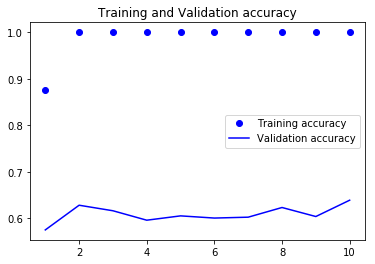

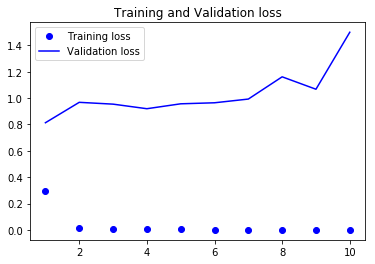

In [43]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [47]:
import os

imdb_dir = '/home/sinhblack/deep_learning_env/deeplearning_with_python_book/aclImdb'
train_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'pos':
                labels.append(1)
            else:
                labels.append(0)
                
sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [49]:
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

   32/25000 [..............................] - ETA: 4s

  320/25000 [..............................] - ETA: 4s

  608/25000 [..............................] - ETA: 4s

  896/25000 [>.............................] - ETA: 4s

 1216/25000 [>.............................] - ETA: 4s

 1504/25000 [>.............................] - ETA: 4s

 1760/25000 [=>............................] - ETA: 4s

 2048/25000 [=>............................] - ETA: 4s

 2400/25000 [=>............................] - ETA: 4s

 2784/25000 [==>...........................] - ETA: 3s

 3104/25000 [==>...........................] - ETA: 3s

 3328/25000 [==>...........................] - ETA: 3s

 3616/25000 [===>..........................] - ETA: 3s

 3936/25000 [===>..........................] - ETA: 3s

 4160/25000 [===>..........................] - ETA: 3s

 4480/25000 [====>.........................] - ETA: 3s

 4768/25000 [====>.........................] - ETA: 3s

 5024/25000 [=====>........................] - ETA: 3s

 5280/25000 [=====>........................] - ETA: 3s

 5568/25000 [=====>........................] - ETA: 3s

 5792/25000 [=====>........................] - ETA: 3s

 6144/25000 [======>.......................] - ETA: 3s

 6400/25000 [======>.......................] - ETA: 3s

 6688/25000 [=======>......................] - ETA: 3s

 6976/25000 [=======>......................] - ETA: 3s

 7232/25000 [=======>......................] - ETA: 3s

 7520/25000 [========>.....................] - ETA: 3s

 7808/25000 [========>.....................] - ETA: 3s

 8096/25000 [========>.....................] - ETA: 3s

 8384/25000 [=========>....................] - ETA: 3s

 8640/25000 [=========>....................] - ETA: 2s

 8928/25000 [=========>....................] - ETA: 2s

 9216/25000 [==========>...................] - ETA: 2s

 9504/25000 [==========>...................] - ETA: 2s

 9728/25000 [==========>...................] - ETA: 2s

 9984/25000 [==========>...................] - ETA: 2s

10336/25000 [===========>..................] - ETA: 2s

10656/25000 [===========>..................] - ETA: 2s

10944/25000 [============>.................] - ETA: 2s

11232/25000 [============>.................] - ETA: 2s

11520/25000 [============>.................] - ETA: 2s

11744/25000 [=============>................] - ETA: 2s

12032/25000 [=============>................] - ETA: 2s

12256/25000 [=============>................] - ETA: 2s

12512/25000 [==============>...............] - ETA: 2s

12800/25000 [==============>...............] - ETA: 2s

13056/25000 [==============>...............] - ETA: 2s

13344/25000 [===============>..............] - ETA: 2s

13632/25000 [===============>..............] - ETA: 2s

13888/25000 [===============>..............] - ETA: 2s

14144/25000 [===============>..............] - ETA: 2s

14368/25000 [================>.............] - ETA: 1s

14656/25000 [================>.............] - ETA: 1s

14944/25000 [================>.............] - ETA: 1s

15200/25000 [=================>............] - ETA: 1s

15456/25000 [=================>............] - ETA: 1s

15712/25000 [=================>............] - ETA: 1s

16000/25000 [==================>...........] - ETA: 1s

16256/25000 [==================>...........] - ETA: 1s

16480/25000 [==================>...........] - ETA: 1s

16704/25000 [===================>..........] - ETA: 1s

16992/25000 [===================>..........] - ETA: 1s

17248/25000 [===================>..........] - ETA: 1s

17568/25000 [====================>.........] - ETA: 1s

17856/25000 [====================>.........] - ETA: 1s

18048/25000 [====================>.........] - ETA: 1s

18336/25000 [=====================>........] - ETA: 1s

18592/25000 [=====================>........] - ETA: 1s

18720/25000 [=====================>........] - ETA: 1s

18944/25000 [=====================>........] - ETA: 1s

19168/25000 [======================>.......] - ETA: 1s

19424/25000 [======================>.......] - ETA: 1s

19648/25000 [======================>.......] - ETA: 1s

19904/25000 [======================>.......] - ETA: 0s

20128/25000 [=======================>......] - ETA: 0s

20384/25000 [=======================>......] - ETA: 0s

20672/25000 [=======================>......] - ETA: 0s

20928/25000 [========================>.....] - ETA: 0s

21280/25000 [========================>.....] - ETA: 0s

21536/25000 [========================>.....] - ETA: 0s

21664/25000 [========================>.....] - ETA: 0s

21920/25000 [=========================>....] - ETA: 0s

22176/25000 [=========================>....] - ETA: 0s

22464/25000 [=========================>....] - ETA: 0s

22752/25000 [==========================>...] - ETA: 0s

23040/25000 [==========================>...] - ETA: 0s

23360/25000 [===========================>..] - ETA: 0s

23648/25000 [===========================>..] - ETA: 0s

24000/25000 [===========================>..] - ETA: 0s

24352/25000 [============================>.] - ETA: 0s

24672/25000 [============================>.] - ETA: 0s

24960/25000 [============================>.] - ETA: 0s

25000/25000 [==============================] - 5s 193us/step


[2.0803644055509567, 0.49992]